# CMF Rateslib Project

## 3 Sub-Projects:
    - Rates Models
    - FI Products
    - Curve Building
  


### Conventions
 - 1 year == 1.0
 - 1 month == 1/12
 - 1 day == 1/252
 - 0.02 == 2%

In [1]:
cmf_rateslib_root = '../'
import sys
if cmf_rateslib_root not in sys.path:
    sys.path.append(cmf_rateslib_root)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dt = 1/252
dW = np.random.randn()*dt
# Mean that dW is 1 day increment with unit annual vol

In [4]:
a=np.interp([2,1.5],[1,3,4],[5,6,7])

# Curves

In [5]:
from cmf_rateslib.curves.base_curve import BaseZeroCurve

In [6]:
from scipy.linalg import sqrtm

## Interpolation & extrapolation

In [7]:
from cmf_rateslib.curves.zero_curve import ZeroCurve

In [14]:
curve = ZeroCurve([3,5,10,15,19], [0.02, 0.03, 0.04,0.045,0.049], 'log_df','continuous',0)

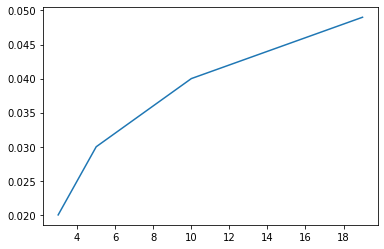

In [15]:
plt.plot(curve._maturities,curve._rates)

In [19]:
t_inter = np.linspace(0, 15)+3.1
t_extra1 = np.linspace(0,3)+19.1
t_extra2 = np.linspace(0,2.9)

t_all = np.append(t_extra2,t_inter)
t_all=np.append(t_all,t_extra1)

pow=2
rates1 = curve.extrapolate(t_extra2,pow=pow)
rates2 = curve.interpolate(t_inter,pow=pow)
rates3 = curve.extrapolate(t_extra1,pow=pow)

rates_all=np.append(rates1,rates2)
rates_all=np.append(rates_all,rates3)

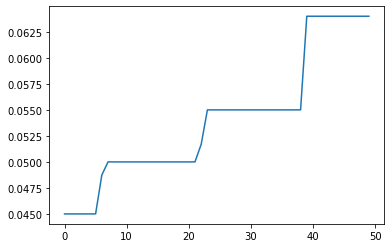

In [20]:
plt.plot(curve.fwd_rate(t_inter,tenor = 0.25))

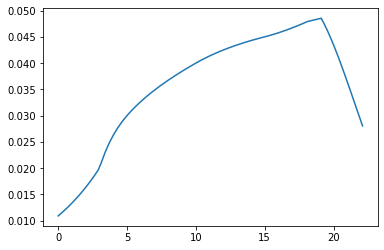

In [21]:
plt.plot(t_all,rates_all)

## Bumping

''

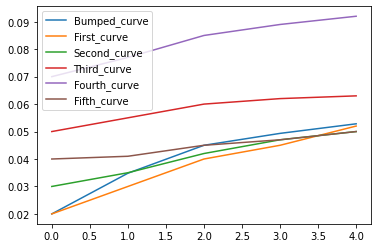

In [31]:
curve1 = ZeroCurve([3,5,10,15,19], [0.02, 0.03, 0.04,0.045,0.052], 'zero_rate','continuous',0)
curve2 = ZeroCurve([3,5,10,15,19], [0.03, 0.035, 0.042,0.047,0.05], 'zero_rate','continuous',0)
curve3 = ZeroCurve([3,5,10,15,19], [0.05, 0.055, 0.06,0.062,0.063], 'zero_rate','continuous',0)
curve4 = ZeroCurve([3,5,10,15,19], [0.07, 0.077, 0.085,0.089,0.092], 'zero_rate','continuous',0)
curve5 = ZeroCurve([3,5,10,15,19], [0.04, 0.041, 0.045,0.047,0.05], 'zero_rate','continuous',0)
curve6 = ZeroCurve([3,5,10,15,19], [0.06, 0.065, 0.067,0.071,0.073], 'zero_rate','continuous',0)

plt.plot(np.arange(5),curve1.bump_pca(np.array([curve._rates,curve2._rates,curve3._rates,curve4._rates,curve5._rates]).T, [0,0.005],[0,2]),
        np.arange(5),curve1._rates, 
        np.arange(5),curve2._rates,
        np.arange(5),curve3._rates,
        np.arange(5),curve4._rates,
        np.arange(5),curve5._rates,)
plt.legend(['Bumped_curve', 'First_curve', 'Second_curve', 'Third_curve', 'Fourth_curve', 'Fifth_curve'])
;

## Roll

''

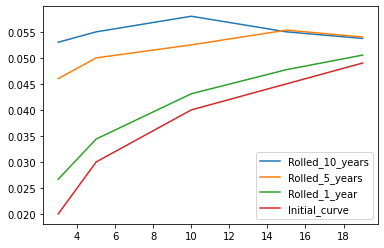

In [21]:
plt.plot(curve._maturities, curve.roll(10)._rates, curve._maturities, curve.roll(5)._rates, curve._maturities, curve.roll(1)._rates, curve._maturities,curve._rates)
plt.legend(['Rolled_10_years','Rolled_5_years','Rolled_1_year', 'Initial_curve'])
;

## Discrete_compounding

In [50]:
curve1 = ZeroCurve([3,5], [0.2,0.4], 'zero_rate','discrete',3)
curve1.df(3)

0.5594245067186422

In [51]:
cont_rate = 3*np.log(1+0.2/3)
print(cont_rate)
curve1 = ZeroCurve([3,5], [cont_rate,0.4], 'zero_rate','continuous',3)
curve1.df(3)

0.1936155634127135


0.5594245067186421